
STACY KIRIIRI
ROSE KYALO
ANGEL ATUNGIRE
BRYTONE OMARE


## Insights on Property Investment Profitability

### Overview

In this project, we're diving deep into the King County House Sales dataset to understand what makes properties profitable in King County's real estate market. Our main aim is to provide valuable insights to property investors who want to make smart investment decisions. We'll be looking at various aspects of properties, like their size, number of bedrooms, and condition, to see which factors have the most impact on the sale prices of houses.
By doing this, we hope to help investors optimize their strategies and increase their
chances of getting better returns in the King County real estate market. 

## Business Understanding

### Stakeholder: RASB-berry Property Investors
    
Business Problem: RASB-berry Property investors are looking to optimize their
investment strategies by purchasing properties with the potential for high returns. They
want to know which property attributes, such as square footage, number of bedrooms,
and condition of the property, are most strongly correlated with sale prices.
Objectives
1. Identify Key Predictors of Property Value
- What are the most significant factors that influence property prices in King
County?
- Which property attributes (e.g., square footage, number of bedrooms, condition)
have the strongest correlation with sale prices?
- How do location-related variables (e.g., ZIP code, proximity to amenities) impact
property values?
2. Optimize Property Selection
- Can we develop a predictive model that estimates the potential return on
investment (ROI) for different properties?
- Are there specific property characteristics or neighborhood features that
consistently lead to higher returns for investors?
- How can property investors identify undervalued properties with growth
potential in the King County market?

3. Market Trends and Timing

- Can we analyze historical data to identify cyclical patterns in the King County real
estate market?
- When is the best time to buy, hold, or sell properties in different neighborhoods?
- Are there seasonal trends that impact property values, and how can investors
capitalize on them?

## Data understanding and data preparation

In [1]:
# importing the libraries to be used in the analysis
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [42]:
#here we load the data to see what it contains
data = pd.read_csv('data/kc_house_data.csv')
data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,11 Excellent,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,NO,NONE,...,7 Average,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,NO,NaN,...,7 Average,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,NO,NONE,...,7 Average,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,NO,NONE,...,7 Average,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [6]:
data.tail(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21587,7852140040,8/25/2014,507250.0,3,2.50,2270,5536,2.0,NaN,NONE,...,8 Good,2270,0.0,2003,0.0,98065,47.5389,-121.881,2270,5731
21588,9834201367,1/26/2015,429000.0,3,2.00,1490,1126,3.0,NO,NONE,...,8 Good,1490,0.0,2014,0.0,98144,47.5699,-122.288,1400,1230
21589,3448900210,10/14/2014,610685.0,4,2.50,2520,6023,2.0,NO,NaN,...,9 Better,2520,0.0,2014,0.0,98056,47.5137,-122.167,2520,6023
21590,7936000429,3/26/2015,1010000.0,4,3.50,3510,7200,2.0,NO,NONE,...,9 Better,2600,910.0,2009,0.0,98136,47.5537,-122.398,2050,6200
21591,2997800021,2/19/2015,475000.0,3,2.50,1310,1294,2.0,NO,NONE,...,8 Good,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,NO,NONE,...,7 Average,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [47]:
#column names
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [44]:
# Concise summary of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [48]:
# Summary statistic for the dataframe
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [10]:
# Check for missing values
print(data.isna().sum())

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


In [50]:
# unique values for the waterfront column
unique_waterfront_values = data['waterfront'].unique()
print(unique_waterfront_values)


[nan 'NO' 'YES']


In [51]:
#unique values for view column
unique_view_values = data['view'].unique()
print(unique_view_values)

['NONE' nan 'GOOD' 'EXCELLENT' 'AVERAGE' 'FAIR']


In [52]:
#unique values for yr_renovated column
unique_yr_renovated_values = data['yr_renovated'].unique()
print(unique_yr_renovated_values)

[   0. 1991.   nan 2002. 2010. 1992. 2013. 1994. 1978. 2005. 2003. 1984.
 1954. 2014. 2011. 1983. 1945. 1990. 1988. 1977. 1981. 1995. 2000. 1999.
 1998. 1970. 1989. 2004. 1986. 2007. 1987. 2006. 1985. 2001. 1980. 1971.
 1979. 1997. 1950. 1969. 1948. 2009. 2015. 1974. 2008. 1968. 2012. 1963.
 1951. 1962. 1953. 1993. 1996. 1955. 1982. 1956. 1940. 1976. 1946. 1975.
 1964. 1973. 1957. 1959. 1960. 1967. 1965. 1934. 1972. 1944. 1958.]


In [11]:
#calculating the percentage of the missing null values
data['waterfront'].isnull().mean()

0.11001527989998611

In [12]:
data['yr_renovated'].isnull().mean()

0.17789507802009538

In [53]:
data['view'].isnull().mean()

0.0029170718155299346

Through our analysis we decide to drop raws with missing values as the number of missing values was not significant to affect the analysis outcome 

In [56]:
# Drop rows with missing values
data.dropna(inplace=True)

In [60]:
#cheking if all the raws with missing values were droped 
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [61]:
# Check for duplicate rows in the entire DataFrame
duplicates = data.duplicated().sum ()
duplicates

0

## Data type conversion

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15762 non-null  int64  
 1   date           15762 non-null  object 
 2   price          15762 non-null  float64
 3   bedrooms       15762 non-null  int64  
 4   bathrooms      15762 non-null  float64
 5   sqft_living    15762 non-null  int64  
 6   sqft_lot       15762 non-null  int64  
 7   floors         15762 non-null  float64
 8   waterfront     15762 non-null  object 
 9   view           15762 non-null  object 
 10  condition      15762 non-null  object 
 11  grade          15762 non-null  object 
 12  sqft_above     15762 non-null  int64  
 13  sqft_basement  15762 non-null  object 
 14  yr_built       15762 non-null  int64  
 15  yr_renovated   15762 non-null  float64
 16  zipcode        15762 non-null  int64  
 17  lat            15762 non-null  float64
 18  long  

We decided to convert the below columns to datetime values 

In [73]:
data['yr_built']=pd.to_datetime(data['yr_built'])

In [75]:
data['yr_renovated']=pd.to_datetime(data['yr_renovated'])

In [76]:
data['date']=pd.to_datetime(data['date'])

In [77]:
#cheking if the columns were coverted to datatime
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             15762 non-null  int64         
 1   date           15762 non-null  datetime64[ns]
 2   price          15762 non-null  float64       
 3   bedrooms       15762 non-null  int64         
 4   bathrooms      15762 non-null  float64       
 5   sqft_living    15762 non-null  int64         
 6   sqft_lot       15762 non-null  int64         
 7   floors         15762 non-null  float64       
 8   waterfront     15762 non-null  object        
 9   view           15762 non-null  object        
 10  condition      15762 non-null  object        
 11  grade          15762 non-null  object        
 12  sqft_above     15762 non-null  int64         
 13  sqft_basement  15762 non-null  object        
 14  yr_built       15762 non-null  datetime64[ns]
 15  yr_renovated   1576

cheking for outliers

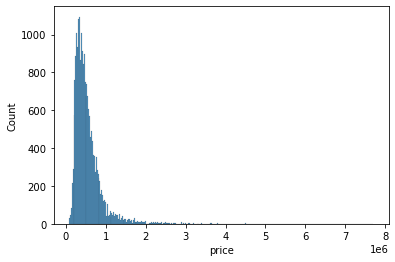

In [21]:
#on the price column

sns.histplot(x=data['price'])
plt.show()


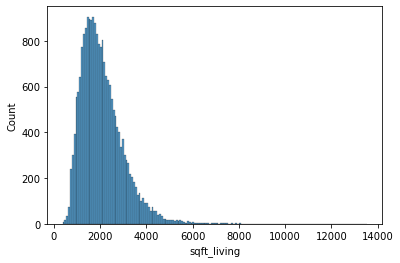

In [24]:
#on the sqft_living

sns.histplot(x=data['sqft_living'])
plt.show()


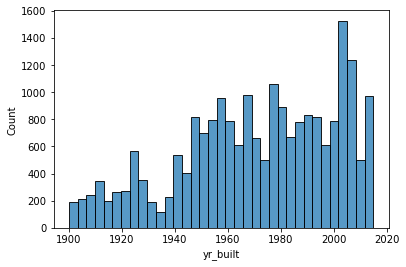

In [25]:
#on the yr_built

sns.histplot(x=data['yr_built'])
plt.show()

In [37]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,total_area
7316,2202500290,2014-05-02,435000.0,4,1.00,1450,8800,1.0,NO,NONE,...,0.0,1954,0.0,98006,47.5746,-122.135,1260,8942,69,21902
20586,7853361370,2014-05-02,555000.0,4,2.50,3310,6500,2.0,NO,NONE,...,0.0,2012,0.0,98065,47.5150,-121.870,2380,5000,11,20500
1040,7197300105,2014-05-02,550000.0,4,2.50,1940,10500,1.0,NaN,NONE,...,800.0,1976,0.0,98052,47.6830,-122.114,2200,10500,47,26280
20543,3438501320,2014-05-02,295000.0,2,2.50,1630,1368,2.0,NO,NONE,...,350.0,2009,0.0,98106,47.5489,-122.363,1590,2306,14,8174
9587,472000620,2014-05-02,790000.0,3,2.50,2600,4750,1.0,NO,NONE,...,900.0,1951,0.0,98117,47.6833,-122.400,2380,4750,72,16180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19381,8149600265,2015-05-14,725000.0,4,1.75,1980,5850,1.0,NaN,FAIR,...,600.0,1960,0.0,98116,47.5607,-122.391,1810,5850,63,16870
12623,4166600610,2015-05-14,335000.0,3,2.00,1410,44866,1.0,NO,NONE,...,0.0,1985,0.0,98023,47.3273,-122.370,2950,29152,38,79788
5632,7923600250,2015-05-15,450000.0,5,2.00,1870,7344,1.5,NO,NONE,...,0.0,1960,0.0,98007,47.5951,-122.144,1870,7650,63,20604
13040,5101400871,2015-05-24,445500.0,2,1.75,1390,6670,1.0,NO,NONE,...,670.0,1941,0.0,98115,47.6914,-122.308,920,6380,82,16080


converting the view, condition and grade columns into numerical representations using one hot encoding

In [40]:


# List of categorical columns to be one-hot encoded
categorical_columns = ['view', 'condition', 'grade']

# Perform one-hot encoding for each categorical column
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=False)

# Drop the original categorical columns if needed
# data_encoded.drop(columns=categorical_columns, inplace=True)


In [41]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,total_area
7316,2202500290,2014-05-02,435000.0,4,1.00,1450,8800,1.0,NO,NONE,...,0.0,1954,0.0,98006,47.5746,-122.135,1260,8942,69,21902
20586,7853361370,2014-05-02,555000.0,4,2.50,3310,6500,2.0,NO,NONE,...,0.0,2012,0.0,98065,47.5150,-121.870,2380,5000,11,20500
1040,7197300105,2014-05-02,550000.0,4,2.50,1940,10500,1.0,NaN,NONE,...,800.0,1976,0.0,98052,47.6830,-122.114,2200,10500,47,26280
20543,3438501320,2014-05-02,295000.0,2,2.50,1630,1368,2.0,NO,NONE,...,350.0,2009,0.0,98106,47.5489,-122.363,1590,2306,14,8174
9587,472000620,2014-05-02,790000.0,3,2.50,2600,4750,1.0,NO,NONE,...,900.0,1951,0.0,98117,47.6833,-122.400,2380,4750,72,16180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19381,8149600265,2015-05-14,725000.0,4,1.75,1980,5850,1.0,NaN,FAIR,...,600.0,1960,0.0,98116,47.5607,-122.391,1810,5850,63,16870
12623,4166600610,2015-05-14,335000.0,3,2.00,1410,44866,1.0,NO,NONE,...,0.0,1985,0.0,98023,47.3273,-122.370,2950,29152,38,79788
5632,7923600250,2015-05-15,450000.0,5,2.00,1870,7344,1.5,NO,NONE,...,0.0,1960,0.0,98007,47.5951,-122.144,1870,7650,63,20604
13040,5101400871,2015-05-24,445500.0,2,1.75,1390,6670,1.0,NO,NONE,...,670.0,1941,0.0,98115,47.6914,-122.308,920,6380,82,16080
